In [2]:
!pip install numpy

In [4]:
!pip install pandas

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [18]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1638,ham,Great comedy..cant stop laughing da:),NaN,NaN,NaN
1298,ham,Your daily text from me ÛÒ a favour this time,NaN,NaN,NaN
5021,ham,Yes its possible but dint try. Pls dont tell t...,NaN,NaN,NaN
5429,ham,"Er yeah, i will b there at 15:26, sorry! Just ...",NaN,NaN,NaN
661,ham,Then mum's repent how?,NaN,NaN,NaN


# 1.Data Cleaning

In [5]:
df.drop(columns= ['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3506,ham,Two fundamentals of cool life: \Walk
5014,ham,I think the other two still need to get cash b...
669,ham,Did u receive my msg?
502,ham,Check with nuerologist.
458,ham,1.20 that call cost. Which i guess isnt bad. M...


In [8]:
df['target']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: target, Length: 5572, dtype: object

In [11]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 537.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/11.0 MB 5.7 MB/s eta 0:00:02
   - -------------------------------------- 0.5/11.0 MB 5.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.0 MB 5.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 5.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.0 MB 5.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/11.0 MB 5.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/11.0 MB 5.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.0 MB 5.1 MB/s eta 0:00:02
   ------

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [26]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [13]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [30]:
df.shape

(5169, 2)

In [61]:
df

,target,text,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,guy bitch act like interest buy someth els nex...


In [62]:
print(df['text'][2])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


# 2.EDA

In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [33]:
!pip install matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.9 kB ? eta -:--:--
     ----------------------------------- -- 153.6/165.9 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB 6.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.0 MB 5.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.0 MB 5.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.0 MB 5.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/8.0 MB 5.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.4/8.0 MB 5.1 MB/s eta 0:00:02
   -------- ------------------------------- 1.7/8.0 MB 5.0 MB/s eta 0:00:02
   --------- ------------------------------ 1.9/8.0 MB 4.9 MB/s eta 0:00:02
   ---------- --

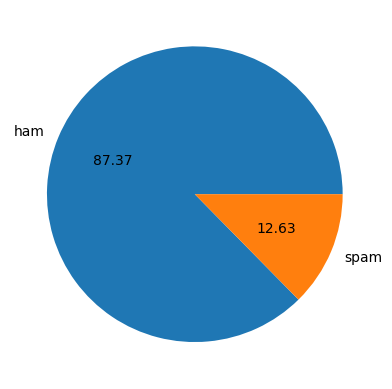

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [35]:
!pip install nltk


     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 320.0 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/42.0 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 288.5 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.6 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 57.6/57.6 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.5 MB 5.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 5.9 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 5.8 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.5 MB 5.4 MB/s eta 0:00:01
   -------

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_characters'] = df['text'].apply(len)

C:\Users\dell\AppData\Local\Temp\ipykernel_7220\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [18]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [19]:
# ham
df[df['target'] == 0][['num_characters']].describe()

,num_characters
count,4516.000000
mean,70.459256
std,56.358207
min,2.000000
25%,34.000000
50%,52.000000
75%,90.000000
max,910.000000


In [20]:
# ham
df[df['target'] == 1][['num_characters']].describe()

,num_characters
count,653.000000
mean,137.891271
std,30.137753
min,13.000000
25%,132.000000
50%,149.000000
75%,157.000000
max,224.000000


In [45]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 901.1 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00


In [21]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

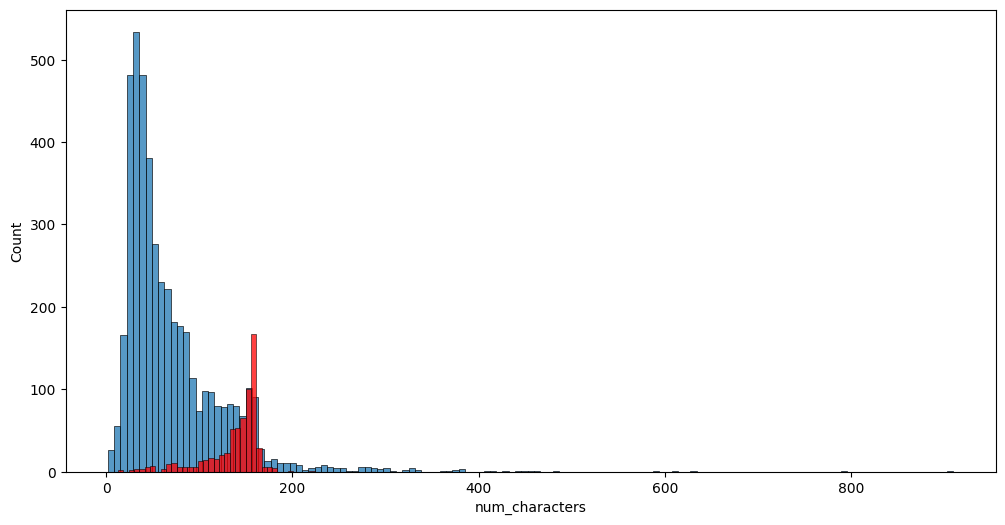

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

# 3.Data Preprocessing
    1.Lower Case
    2.Tokenization
    3.Removing special characters
    4.Removing stop words
    5.stemming

In [23]:
import nltk
from nltk.corpus import stopwords
import string

# Make sure you have downloaded the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('running')

'run'

In [26]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [27]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [28]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\dell\AppData\Local\Temp\ipykernel_7220\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [29]:
df.head()

,target,text,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [64]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   --------------------- ------------------ 163.8/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00


In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [31]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

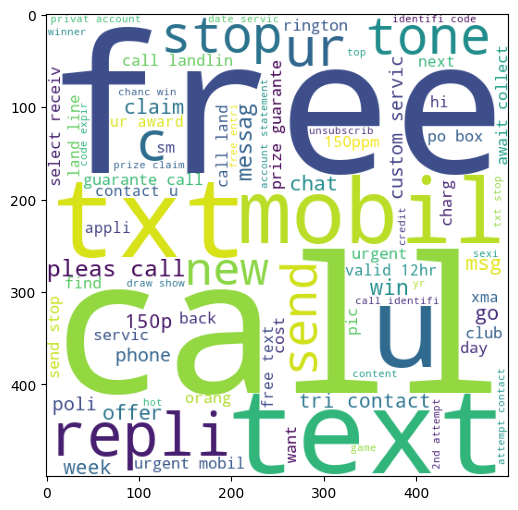

In [32]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [34]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

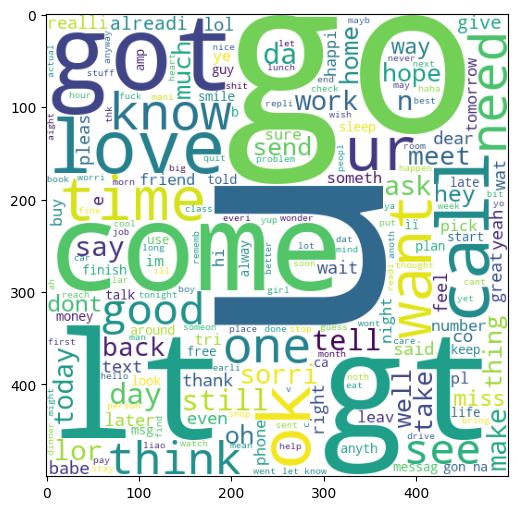

In [35]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [38]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

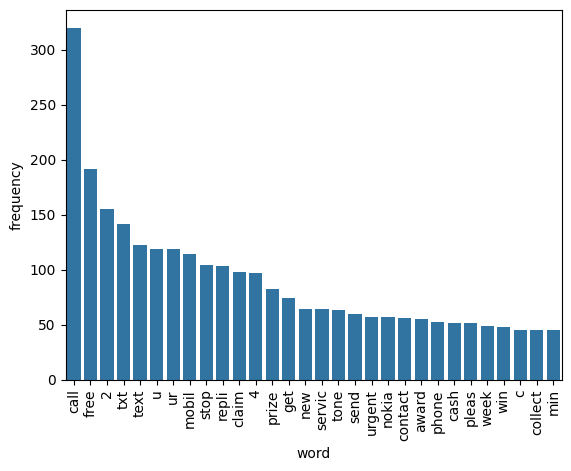

In [42]:
from collections import Counter
counter_data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'frequency'])

# Plotting the bar plot
sns.barplot(x='word', y='frequency', data=counter_data)
plt.xticks(rotation='vertical')
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

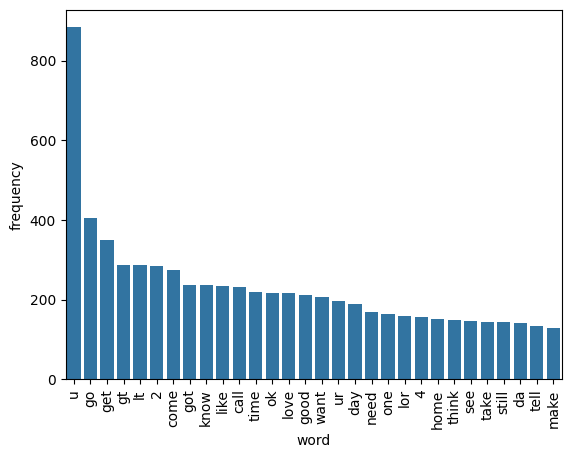

In [44]:
counter_data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'frequency'])

# Plotting the bar plot
sns.barplot(x='word', y='frequency', data=counter_data)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [47]:
X.shape

(5169, 3000)

In [48]:
y = df['target'].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [54]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [55]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [56]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))